# Ensemble model

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
from datetime import datetime, timedelta
from copy import deepcopy

from modules.training_module import TrainingModule
from model_wrappers.model_factory import ModelFactory
from configs.base_config import TrainingModuleConfig

from nb_utils import train_eval, forecast
from nb_utils import plot_m1, plot_m2, plot_m3
from nb_utils import set_dates

In [3]:
with open('../notebooks/train_config.json') as f_train_1, \
    open('../config/sample_ensemble_train_config.json') as f_train_2, \
    open('../config/sample_ensemble_test_config.json') as f_test, \
    open('../config/sample_ensemble_forecasting_config.json') as f_forecast:
    default_train_config = json.load(f_train_1)
    ensemble_train_config = json.load(f_train_2)
    ensemble_test_config = json.load(f_test)
    ensemble_forecast_config = json.load(f_forecast)

In [4]:
# region = ['bengaluru urban'] 
# region_type = 'district'
# current_day = datetime.now().date() - timedelta(24)
# forecast_length = 30

# train_eval_plot(region, region_type, 
#                 current_day, forecast_length,
#                 ensemble_train_config, ensemble_test_config,
#                 max_evals = 10, 'tracker_district_daily',
#                 mlflow_log = False, mlflow_run_name = None)

## Step by step

In [5]:
current_day = datetime.now().date() - timedelta(23)

dates = set_dates(current_day)
    
train1_start_date = dates['train1_start_date']
train1_end_date = dates['train1_end_date']
train1_run_day = dates['train1_run_day']

train2_start_date = dates['train2_start_date']
train2_end_date = dates['train2_end_date']
train2_run_day = dates['train2_run_day']

test_start_date = dates['test_start_date']
test_end_date = dates['test_end_date']
test_run_day = dates['test_run_day']

dates

{'train1_start_date': '5/21/20',
 'train1_end_date': '5/27/20',
 'train1_run_day': '5/20/20',
 'train2_start_date': '5/28/20',
 'train2_end_date': '6/4/20',
 'train2_run_day': '5/27/20',
 'test_start_date': '5/28/20',
 'test_end_date': '6/4/20',
 'test_run_day': '5/27/20'}

In [6]:
default_train_config['region_name'] = ['bengaluru urban']
default_train_config['region_type'] = 'district'
default_train_config['train_start_date'] = train1_start_date
default_train_config['train_end_date'] = train1_end_date
default_train_config['search_parameters']['max_evals'] = 50
default_train_config['ensemble'] = "True"
default_train_config['data_source'] = "tracker_district_daily"
default_train_config['output_filepath'] = "testing"

In [7]:
default_train_config

{'data_source': 'tracker_district_daily',
 'region_name': ['bengaluru urban'],
 'region_type': 'district',
 'train_start_date': '5/21/20',
 'train_end_date': '5/27/20',
 'model_class': 'SEIHRD',
 'model_parameters': {'incubation_period': 5, 'F_icu': 0.05},
 'ensemble': 'True',
 'search_space': {'r0': [0.5, 3],
  'EbyCRatio': [0.001, 70],
  'IbyCRatio': [0.001, 2],
  'infectious_period': [1, 10],
  'F_hospitalization': [0, 0.125],
  'F_fatalities': [0.02, 0.12]},
 'search_parameters': {'max_evals': 50},
 'training_loss_function': {'metric_name': 'mape',
  'variable_weights': [{'variable': 'confirmed', 'weight': 0.25},
   {'variable': 'recovered', 'weight': 0.25},
   {'variable': 'deceased', 'weight': 0.25},
   {'variable': 'hospitalized', 'weight': 0.25}]},
 'loss_functions': [{'metric_name': 'mape',
   'variable_weights': [{'variable': 'confirmed', 'weight': 1}]},
  {'metric_name': 'mape',
   'variable_weights': [{'variable': 'hospitalized', 'weight': 1}]},
  {'metric_name': 'mape',
  

In [8]:
train_config = TrainingModuleConfig.parse_obj(default_train_config)

In [9]:
training_output = TrainingModule.from_config(train_config)

t = 7.90                                              
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                       
t = 7.90                                                                        
t = 7.90                                                                        
t = 7.90                                                       

In [10]:
ensemble_train_config.update(training_output)

In [11]:
ensemble_train_config

{'model_class': 'heterogeneous_ensemble',
 'ensemble': 'False',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 62.76706968454027,
     'F_fatalities': 0.10361025013126428,
     'F_hospitalization': 0.11774148870982276,
     'IbyCRatio': 1.4959710296783624,
     'infectious_period': 5.215625029949605,
     'r0': 2.9233589352710756,
     'LatentEbyCRatio': {'5/20/20': 62.76706968454027,
      '5/27/20': 2.284474379647862},
     'LatentIbyCRatio': {'5/20/20': 1.4959710296783624,
      '5/27/20': 0.19306949794639205}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 62.76706968454027,
     'F_fatalities': 0.10361025013126428,
     'F_hospitalization': 0.11774148870982276,
     'IbyCRatio': 1.4959710296783624,
     'infectious_period': 5.215625029949605,
     'r0': 2.9233589352710756,
     'LatentEbyCRat

In [12]:
params, metrics, train1_model_params, train2_model_params = train_eval(['bengaluru urban'], 'district', 
                                                                       train1_start_date, train1_end_date, 
                                                                       train2_start_date, train2_end_date, train2_run_day,
                                                                       test_start_date, test_end_date,
                                                                       ensemble_train_config, ensemble_test_config,
                                                                       max_evals=2, data_source='tracker_district_daily',
                                                                       mlflow_log=False, name_prefix="testing")

t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
100%|██████████| 2/2 [00:00<00:00,  3.93trial/s, best loss: 100.0]            
Best fit: {'beta': 0.17953050397908055}
Best Loss: 100.0
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90


In [13]:
params

{'region': 'bengaluru urban',
 'region_type': 'district',
 'train1_start_date': '5/21/20',
 'train1_end_date': '5/27/20',
 'train2_start_date': '5/28/20',
 'train2_end_date': '6/4/20',
 'run_day': '5/27/20',
 'test_start_date': '5/28/20',
 'test_end_date': '6/4/20',
 'data_source': 'tracker_district_daily'}

In [14]:
metrics

{'Train1RMLSE': 0,
 'Train1MAPE': 7648.0994586027155,
 'Train1_mape_confirmed': 1506.341328845014,
 'Train1_mape_confirmed_weight': 1.0,
 'Train1_mape_hospitalized': 778.8932839156232,
 'Train1_mape_hospitalized_weight': 1.0,
 'Train1_mape_recovered': 2001.661739520324,
 'Train1_mape_recovered_weight': 1.0,
 'Train1_mape_deceased': 3361.203106321755,
 'Train1_mape_deceased_weight': 1.0,
 'TestMAPE': 694.081368927761,
 'TestRMLSE': 0,
 'Test_mape_confirmed': 46.18804306927363,
 'Test_mape_confirmed_weight': 1.0,
 'Test_mape_hospitalized': 55.99451226383512,
 'Test_mape_hospitalized_weight': 1.0,
 'Test_mape_recovered': 102.64316051832787,
 'Test_mape_recovered_weight': 1.0,
 'Test_mape_deceased': 350.43937929077214,
 'Test_mape_deceased_weight': 1.0,
 'Train2MAPE': 555.2650951422088,
 'Train2RMLSE': 0,
 'Train2_mape_confirmed': 46.188043069273654,
 'Train2_mape_confirmed_weight': 1.0,
 'Train2_mape_hospitalized': 55.994512263835105,
 'Train2_mape_hospitalized_weight': 1.0,
 'Train2_mape

In [15]:
train1_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 62.76706968454027,
     'F_fatalities': 0.10361025013126428,
     'F_hospitalization': 0.11774148870982276,
     'IbyCRatio': 1.4959710296783624,
     'infectious_period': 5.215625029949605,
     'r0': 2.9233589352710756,
     'LatentEbyCRatio': {'5/20/20': 62.76706968454027,
      '5/27/20': 2.284474379647862},
     'LatentIbyCRatio': {'5/20/20': 1.4959710296783624,
      '5/27/20': 0.19306949794639205}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 62.76706968454027,
     'F_fatalities': 0.10361025013126428,
     'F_hospitalization': 0.11774148870982276,
     'IbyCRatio': 1.4959710296783624,
     'infectious

In [16]:
train2_model_params

{'data_source': 'tracker_district_daily',
 'region': ['bengaluru urban'],
 'region_type': 'district',
 'model_type': 'heterogeneous_ensemble',
 'model_parameters': {'constituent_models': {'0': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 62.76706968454027,
     'F_fatalities': 0.10361025013126428,
     'F_hospitalization': 0.11774148870982276,
     'IbyCRatio': 1.4959710296783624,
     'infectious_period': 5.215625029949605,
     'r0': 2.9233589352710756,
     'LatentEbyCRatio': {'5/20/20': 62.76706968454027,
      '5/27/20': 2.284474379647862},
     'LatentIbyCRatio': {'5/20/20': 1.4959710296783624,
      '5/27/20': 0.19306949794639205}}},
   '1': {'model_class': 'SEIHRD',
    'model_parameters': {'incubation_period': 5,
     'F_icu': 0.05,
     'EbyCRatio': 62.76706968454027,
     'F_fatalities': 0.10361025013126428,
     'F_hospitalization': 0.11774148870982276,
     'IbyCRatio': 1.4959710296783624,
     'infectious

In [17]:
forecast_start_date = '6/2/20'
forecast_length = 30
forecast_run_day = (datetime.strptime(forecast_start_date, "%m/%d/%y") - timedelta(days=1)).strftime("%-m/%-d/%y")
forecast_end_date = (datetime.strptime(forecast_start_date, "%m/%d/%y") + timedelta(days=forecast_length)).strftime("%-m/%-d/%y")

In [18]:
forecast(train2_model_params, forecast_run_day, forecast_start_date, forecast_end_date, ensemble_forecast_config)

t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90


/Users/nayana/anaconda3/envs/covidv/lib/python3.8/site-packages/pandas/core/frame.py:6690: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(to_concat, ignore_index=ignore_index,


prediction_type,index,exposed,icu_mean,active_max,hospitalized_min,hospitalized_max,icu_min,icu_max,recovered_min,recovered_max,...,confirmed_min,recovered_mean,confirmed_max,deceased_mean,confirmed_mean,hospitalized_mean,active_mean,infected,final,active_min
0,6/10/20,1740.136466,7.475494,298.232921,0.786848,298.232921,0.039342,14.911646,5.310181,2012.676911,...,6.710812,1008.993546,2543.547429,116.625691,1275.129121,149.509884,149.509884,1026.735951,1125.619237,0.786848
1,6/11/20,2011.759858,8.662142,345.573934,0.911751,345.573934,0.045588,17.278697,6.198403,2349.332851,...,7.826604,1177.765627,2966.457151,136.133408,1487.141877,173.242842,173.242842,1189.399387,1313.899035,0.911751
2,6/12/20,2327.116000,10.033554,400.286074,1.056102,400.286074,0.052805,20.014304,7.227414,2739.351063,...,9.118905,1373.289238,3456.268211,158.733231,1732.693558,200.671088,200.671088,1376.991543,1532.022470,1.056102
3,6/13/20,2692.859053,11.619245,463.546774,1.223007,463.546774,0.061150,23.177339,8.419220,3191.071836,...,10.615372,1599.745528,4023.462354,184.908444,2017.038863,232.384891,232.384891,1593.601358,1784.653972,1.223007
4,6/14/20,3116.088247,13.448488,536.523967,1.415547,536.523967,0.070777,26.826198,9.799088,3714.072580,...,12.347274,1861.935834,4679.891939,215.214015,2346.119606,268.969757,268.969757,1844.272403,2077.149849,1.415547
5,6/15/20,3605.311946,15.563308,620.894174,1.638147,620.894174,0.081907,31.044709,11.395969,4319.326299,...,14.351333,2165.361134,5439.474818,250.285781,2726.913075,311.266160,311.266160,2134.742205,2415.646915,1.638147
6,6/16/20,4171.332433,18.007258,718.394922,1.895390,718.394922,0.094769,35.919746,13.243847,5019.712978,...,16.670042,2516.478412,6318.317254,290.870079,3167.493648,360.145156,360.145156,2470.705555,2807.348492,1.895390
7,6/17/20,4826.495292,20.835270,831.217724,2.193058,831.217724,0.109653,41.560886,15.381841,5830.060573,...,19.352827,2922.721207,7335.152618,337.826125,3677.252722,416.705391,416.705391,2858.992955,3260.547332,2.193058
8,6/18/20,5585.052983,24.114260,962.032191,2.538194,962.032191,0.126910,48.101610,17.855910,6767.787901,...,22.458001,3392.821906,8512.082716,392.163260,4267.270358,482.285192,482.285192,3307.944701,3784.985166,2.538194
9,6/19/20,6463.164845,27.914569,1113.644547,2.938203,1113.644547,0.146910,55.682227,20.719655,7853.210754,...,26.052763,3936.965204,9874.577786,455.058695,4950.315274,558.291375,558.291375,3827.410880,4392.023899,2.938203


t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90
t = 7.90


/Users/nayana/anaconda3/envs/covidv/lib/python3.8/site-packages/pandas/core/frame.py:6690: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(to_concat, ignore_index=ignore_index,


t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90


/Users/nayana/anaconda3/envs/covidv/lib/python3.8/site-packages/pandas/core/frame.py:6690: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(to_concat, ignore_index=ignore_index,
/Users/nayana/anaconda3/envs/covidv/lib/python3.8/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


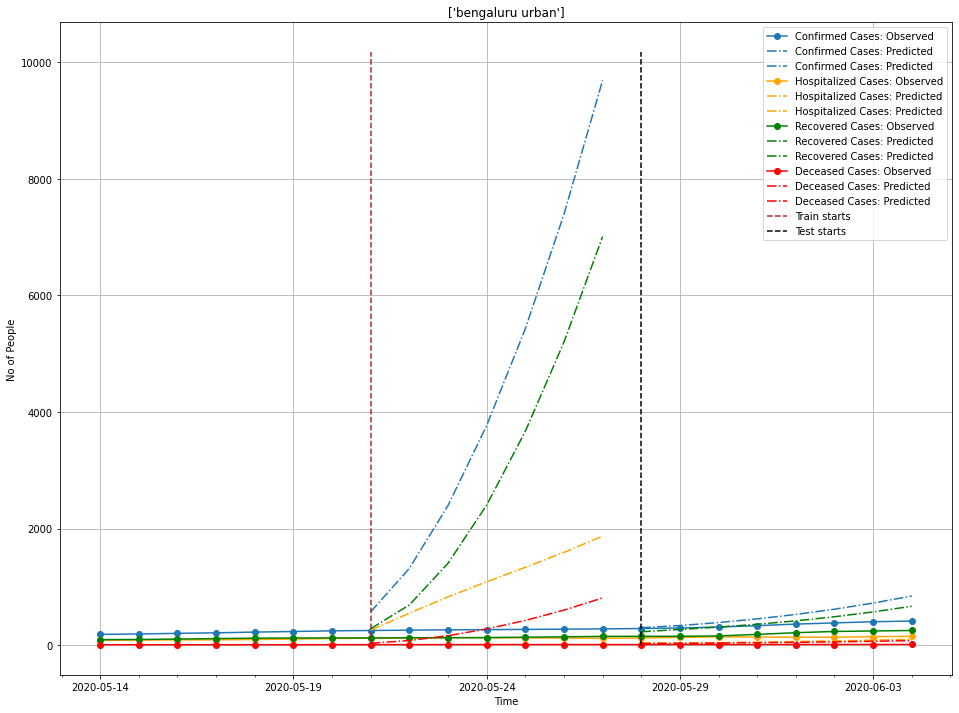

In [19]:
plot_m1(train1_model_params, train1_run_day, train1_start_date, train1_end_date, 
        test_run_day, test_start_date, test_end_date, 
        rolling_average = False, uncertainty = False, 
        forecast_config = '../config/sample_ensemble_forecasting_config.json',
        plot_config = 'plot_config.json', plot_name = 'm1.png')

t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90
t = 8.90


/Users/nayana/anaconda3/envs/covidv/lib/python3.8/site-packages/pandas/core/frame.py:6690: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(to_concat, ignore_index=ignore_index,


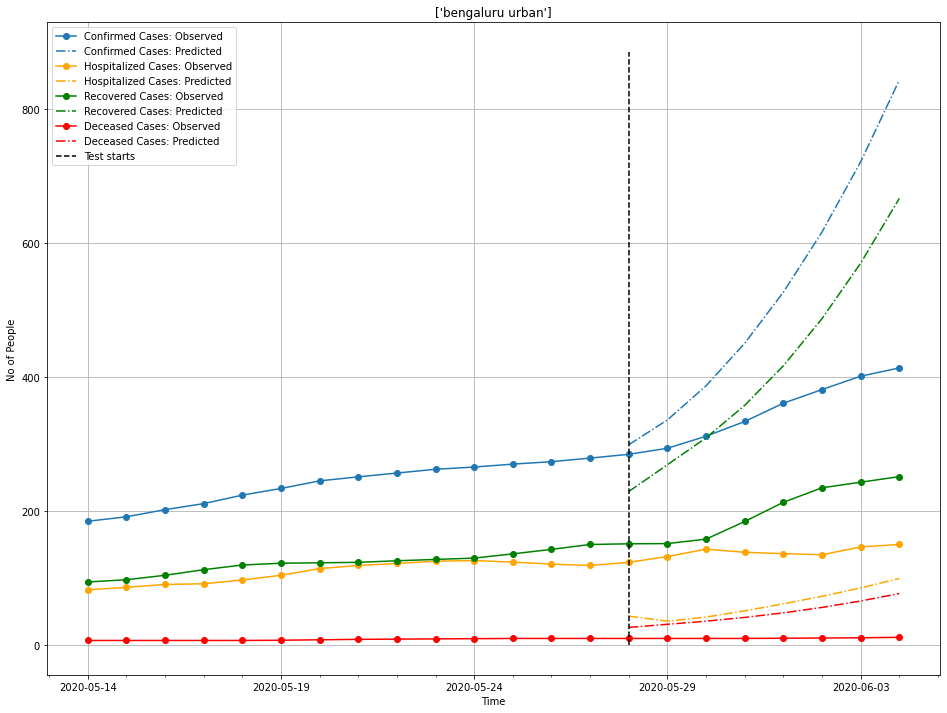

In [20]:
plot_m2(train2_model_params, train1_start_date, train1_end_date,
        test_run_day, test_start_date, test_end_date, 
        rolling_average = False, uncertainty = False, 
        forecast_config = '../config/sample_ensemble_forecasting_config.json',
        plot_config = 'plot_config.json', plot_name = 'm2.png')

t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90


/Users/nayana/anaconda3/envs/covidv/lib/python3.8/site-packages/pandas/core/frame.py:6690: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return concat(to_concat, ignore_index=ignore_index,


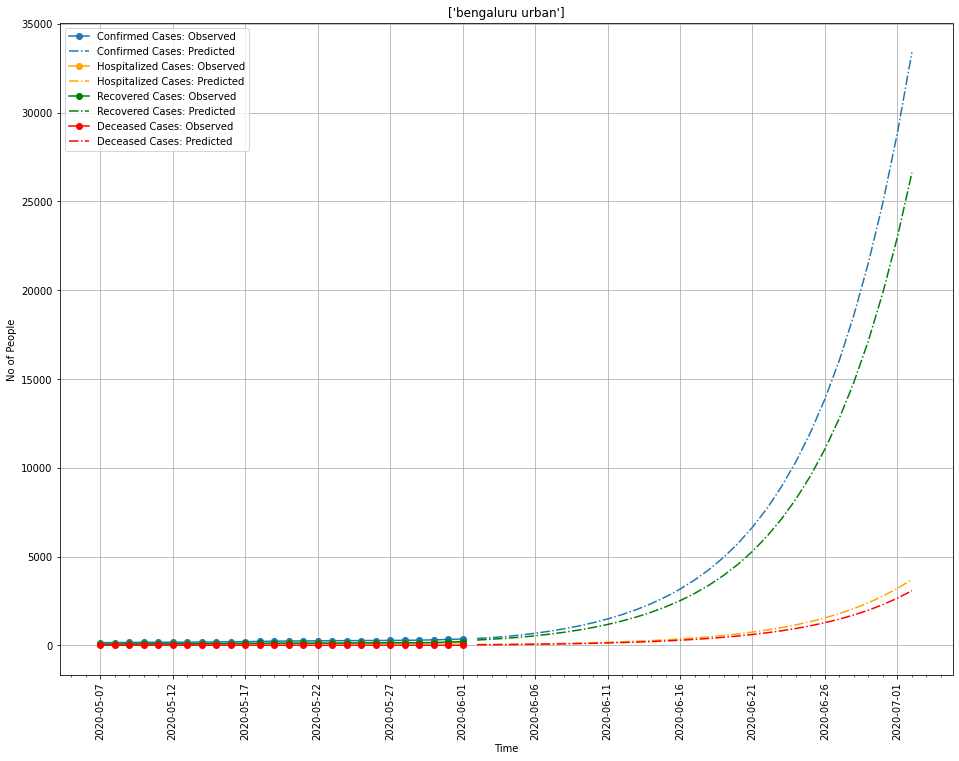

In [21]:
plot_m3(train2_model_params, train1_start_date, 
        forecast_start_date, forecast_length, 
        rolling_average = False, uncertainty = False,
        forecast_config = '../config/sample_ensemble_forecasting_config.json',
        plot_config = 'plot_config.json', plot_name = 'm3.png')

In [22]:
uncertainty_forecast_config = deepcopy(ensemble_forecast_config)

uncertainty_forecast_config['with_uncertainty'] = True

In [ ]:
uncertainty_df = forecast(train2_model_params, forecast_run_day, forecast_start_date, forecast_end_date, uncertainty_forecast_config)

t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90
t = 31.90


In [ ]:
import pandas as pd
pd.set_option("display.max_columns", None)
uncertainty_df